In [ ]:
#Something put name of the assignment like Arima

In [1]:
#Import Packages
import pandas as pd
from matplotlib import pyplot as plt #time series plotting

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#ARIMA and SARIMA function
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller #stationary test
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Calculating Metrics
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
#import data
df = pd.read_csv("Electric_Production.csv", parse_dates = ['DATE'], index_col = ['DATE'])
df.head()

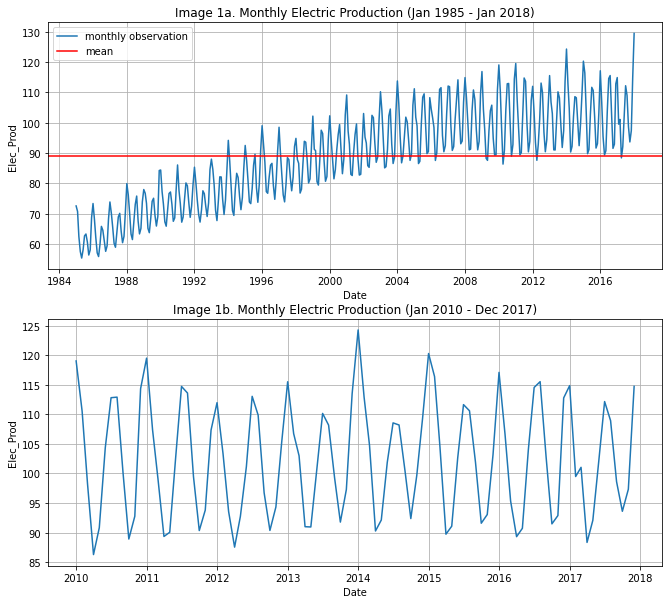

In [2]:
# Plot bulanan 1985-2018
plt.figure(figsize=(11,10))
plt.subplot(2, 1, 1)
plt.plot(df)
plt.axhline(y = df['IPG2211A2N'].mean(), color = 'r', linestyle = '-')
plt.title('Image 1a. Monthly Electric Production (Jan 1985 - Jan 2018)')
plt.xlabel('Date')
plt.ylabel('Elec_Prod')
plt.grid()
plt.legend(['monthly observation','mean'], loc='upper left')
# Plot bulanan 2010-2017
start, end = '2010-01', '2017-12'
plt.subplot(2, 1, 2)
plt.plot(df.loc[start:end, 'IPG2211A2N'])
plt.title('Image 1b. Monthly Electric Production (Jan 2010 - Dec 2017)')
plt.xlabel('Date')
plt.ylabel('Elec_Prod')
plt.grid()
plt.show()

In [3]:
def adf_test(dataset):
    result = adfuller(dataset)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.4f' % (key, value))
adf_test(df['IPG2211A2N'])

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708


In [4]:
df2 = df
df2['diff_1'] = df2['IPG2211A2N'].diff()
df2.iloc[0,1] = 0
adf_test(df2['diff_1'])

ADF Statistic: -7.085381
p-value: 0.000000
Critical Values:
	1%: -3.4476
	5%: -2.8691
	10%: -2.5708


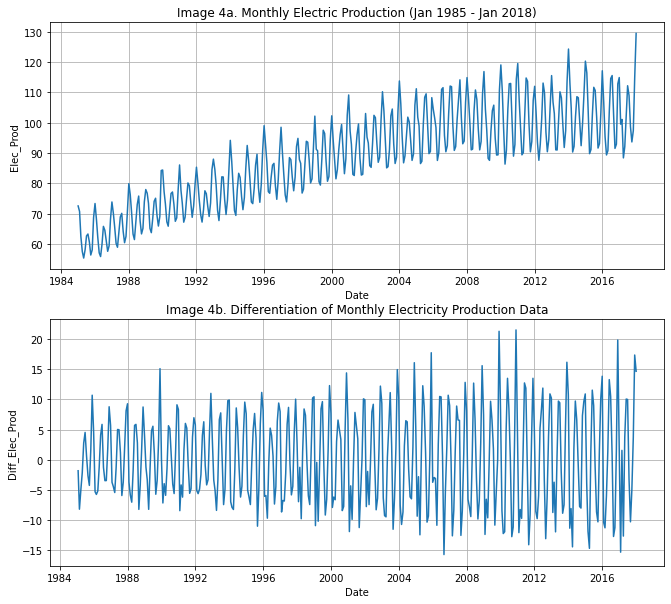

In [5]:
# Plot bulanan 1985-2018
plt.figure(figsize=(11,10))
plt.subplot(2, 1, 1)
plt.plot(df['IPG2211A2N'])
plt.title('Image 4a. Monthly Electric Production (Jan 1985 - Jan 2018)')
plt.xlabel('Date')
plt.ylabel('Elec_Prod')
plt.grid()
# Plot Hasil Diferensiasi
plt.subplot(2, 1, 2)
plt.plot(df.IPG2211A2N.diff())
plt.title('Image 4b. Differentiation of Monthly Electricity Production Data')
plt.xlabel('Date')
plt.ylabel('Diff_Elec_Prod')
plt.grid()
plt.show()

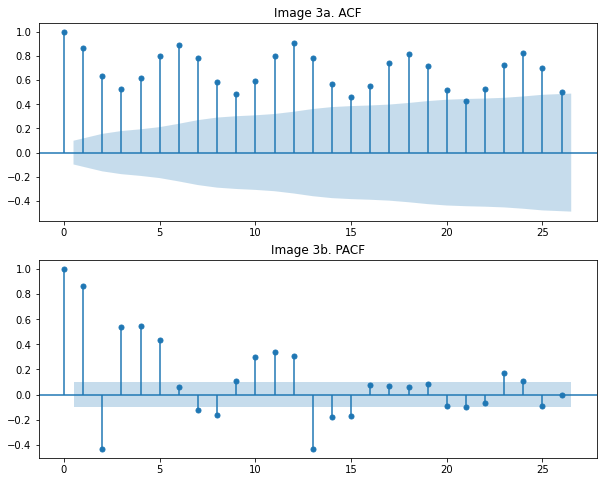

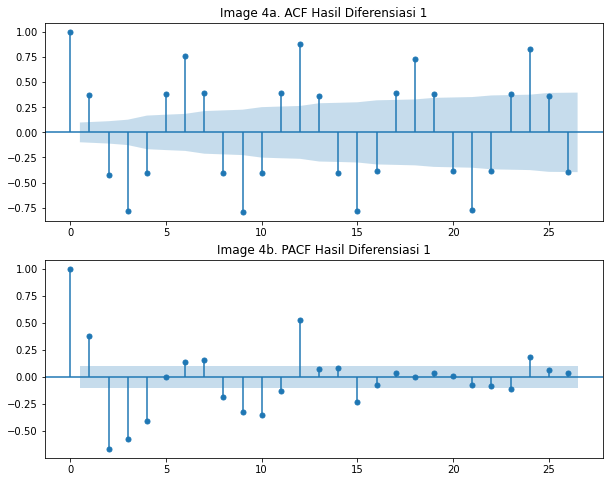

In [6]:
#Plot ACF dan PACF data asli
plt.figure(figsize=(10,8))
plt.subplot(211)
plot_acf(df['IPG2211A2N'], ax=plt.gca())
plt.title('Image 3a. ACF')
plt.subplot(212)
plot_pacf(df['IPG2211A2N'], ax=plt.gca())
plt.title('Image 3b. PACF')
plt.show()
#Plot ACF dan PACF data hasil diferensiasi
plt.figure(figsize=(10,8))
plt.subplot(211)
plot_acf(df2['diff_1'], ax=plt.gca())
plt.title('Image 4a. ACF Hasil Diferensiasi 1')
plt.subplot(212)
plot_pacf(df2['diff_1'], ax=plt.gca())
plt.title('Image 4b. PACF Hasil Diferensiasi 1')
plt.show()

In [7]:
# Pisahkan data train dan test, set data test untuk 1 tahun terakhir
df_train = df.iloc[:len(df)-12]
df_test = df.iloc[len(df)-12:]

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1780.859, Time=1.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1913.683, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1849.478, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1752.427, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1878.937, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1752.805, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1751.815, Time=0.76 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1751.379, Time=0.86 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1736.687, Time=1.73 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1743.419, Time=0.57 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1773.259, Time=1.02 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1690.892, Time=2.05 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1699.651, Time=1.28 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1692.957, Time=1.06 sec
 ARIMA(1,1,1)(1,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  385
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -838.446
Date:                                 Mon, 17 May 2021   AIC                           1690.892
Time:                                         10:49:31   BIC                           1718.324
Sample:                                              0   HQIC                          1701.786
                                                 - 385                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4976      0.050      9.901      0.000       0.399       0.596
ma.L1         -0.9488      0.019    -49.892      0.000      -0.986      -0.912
ar.S.L12       0.6178      0.176      3.512      0.000       0.273       0.963
ar.S.L24      -0.2780      0.062     -4.454      0.000      -0.400      -0.156
ma.S.L12      -1.3278      0.174     -7.633      0.000      -1.669      -0.987
ma.S.L24       0.5258      0.142      3.713      0.000       0.248       0.803
sigma2         5.1069      0.339     15.083      0.000       4.443       5.771
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                13.54
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Fitting model ARIMA dengan algoritma stepwise
stepwise_fit = auto_arima(df_train['IPG2211A2N'], start_p = 0, start_q = 0,
                          m = 12, start_P = 0, D = 1, 
                          stationary = False, #diketahui tidak stasioner
                          seasonal = True, #data punya efek musiman
                          trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True, 
                          stepwise = True)           
stepwise_fit.summary()

In [8]:
# Fitting model ke full dataset
model = SARIMAX(df['IPG2211A2N'], order = (1, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -880.821
Date:                            Mon, 17 May 2021   AIC                           1773.643
Time:                                    10:49:32   BIC                           1797.347
Sample:                                01-01-1985   HQIC                          1783.045
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5067      0.047     10.716      0.000       0.414       0.599
ma.L1         -0.9513      0.019    -51.223      0.000      -0.988      -0.915
ar.S.L12      -0.0564      0.063     -0.888      0.375      -0.181       0.068
ar.S.L24      -0.2573      0.063     -4.078      0.000      -0.381      -0.134
ma.S.L12      -0.6610      0.061    -10.835      0.000      -0.781      -0.541
sigma2         5.5419      0.330     16.769      0.000       4.894       6.190
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                23.34
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,Forecast
2018-02-01,114.707760
2018-03-01,106.263905
2018-04-01,92.353931
2018-05-01,93.968135
2018-06-01,104.072766
...,...
2027-09-01,106.110172
2027-10-01,97.904800
2027-11-01,101.257243
2027-12-01,116.244139


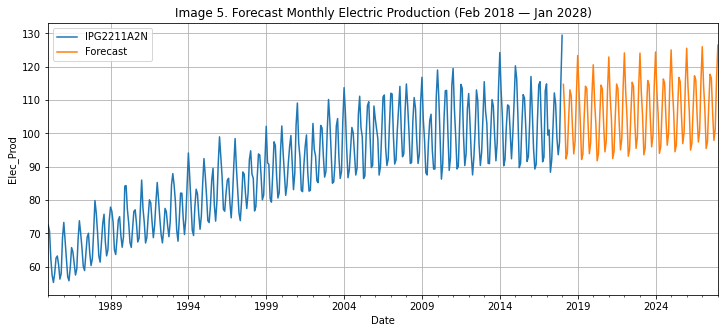

In [9]:
# Forecast data untuk 120 bulan selanjutnya
forecast = result.predict(start = len(df),
 end = (len(df)-1) + 120,
 typ = 'levels').rename('Forecast')
df_forecast = pd.DataFrame(forecast)
display(df_forecast)

In [ ]:
# Plot nilai hasil forecasting 12 bulan selanjutnya
df['IPG2211A2N'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title('Image 5. Forecast Monthly Electric Production (Feb 2018 — Jan 2028)')
plt.xlabel('Date')
plt.ylabel('Elec_Prod')
plt.grid()
plt.show()

In [10]:
forecast.to_csv('Forcasted.csv')